# Construindo modelos com distancias métricas

Clustering é relacionado classificação de categorias, há conjunto finitos de categorias. Ao contrário da "classificação", com clustering não se sabe quais categorias há.

## Usando K-means para agrupar dados

Primeiro bora ver como se faz um clustering simples

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import make_blobs
bolhas, classes = make_blobs(500, centers=3)

In [3]:
# para visualizar
import matplotlib.pyplot as plt
%matplotlib inline

Trabalhando com dados não verdadeiros (fake data)

1. olhando para os bolhas(blobs)

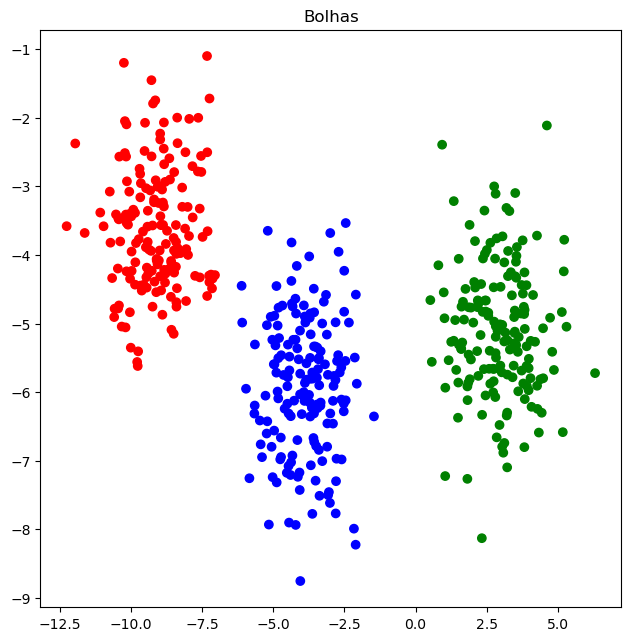

In [4]:
f, ax = plt.subplots(figsize=(7.5,7.5))
rgb = np.array(['r','g','b'])
ax.scatter(bolhas[:,0], bolhas[:,1], color=rgb[classes])
ax.set_title("Bolhas")
plt.show()

O **K-means** serve para encontrar o centro destas bolhas

2. vamos fingir que há 3 centros

In [5]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)

In [6]:
kmean.fit(bolhas)

KMeans(n_clusters=3)

In [7]:
kmean.cluster_centers_

array([[-9.12259048, -3.6187122 ],
       [ 2.94252296, -5.10901221],
       [-3.89700818, -5.91876334]])

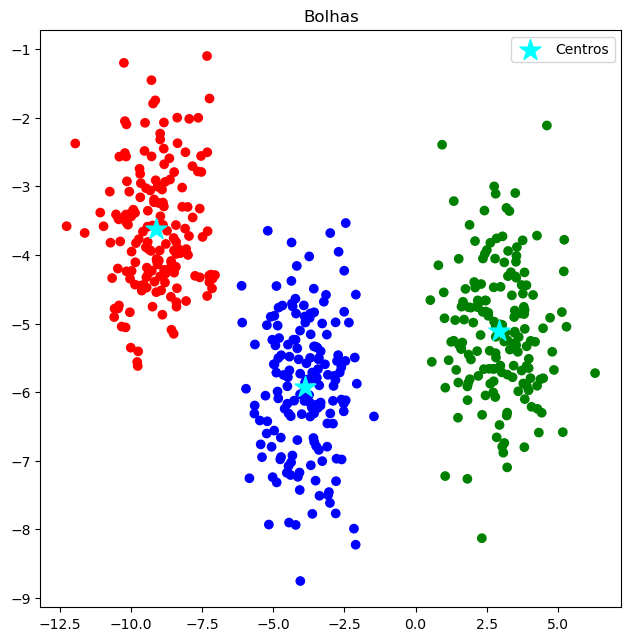

In [8]:
# visualizar
f, ax = plt.subplots(figsize=(7.5,7.5))
ax.scatter(bolhas[:,0], bolhas[:,1], color=rgb[classes])
ax.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], marker='*', s=250, color="cyan", label="Centros")
ax.set_title("Bolhas")
ax.legend(loc="best")
plt.show()

In [9]:
kmean.labels_[:5]

array([0, 2, 0, 0, 2], dtype=int32)

Pode-se verficar se o `labels_` é o mesmo que `classes`

In [10]:
classes[:5]

array([0, 2, 0, 0, 2])

A função `transform` é bem útil no sentido que mostra a distância entre cada ponto e o centroide

In [11]:
kmean.transform(bolhas)[:5]

array([[ 2.18102629, 10.02451873,  3.54583   ],
       [ 5.63744303,  6.79616099,  0.34402721],
       [ 1.8615191 , 13.52130026,  6.7736964 ],
       [ 0.80330569, 11.40579016,  4.90770236],
       [ 5.80052584,  7.66508858,  1.29020006]])

## Como funciona

K-mean é um algoritmo que funciona minimizando a distância da soma dos quadrados desde a média.

Funciona primeiro assignando um número de grupos, K, e depois alternando o seguinte:

- Designar cada ponto para o grupo mais próximo
- atualizar o centroide do grupo, calculando a média de todos os membros do grupo incluindo os recentes adicionados.

## Otimizando o número de centroides

Quando se faz clustering, não se sabe o número exato de grupos por antecipado, mas uma vez estimado o número de grupos, o problema começa ficar apropriado para classificação.
Avaliar as técnicas para modelos sem supervisão é um tanto meticuloso... o scikit learn tem algumas alternativas

1. criar varias blobs (bolhas) que serve para simular os grupos

In [12]:
from sklearn.datasets import make_blobs
import numpy as np

In [13]:
blobs, classes = make_blobs(500, centers=3)

In [14]:
kmean = KMeans(n_clusters=3)

In [15]:
kmean.fit(blobs)

KMeans(n_clusters=3)

2. Olharar para a silhueta da distância. Essa silhueta é a taxa de diferença entre dissimilaridade no grupo e a dissimilaridade mais proxima fora do grupo. Poderia ser dito, o quã longe estam os grupos entre sí.

In [16]:
from sklearn import metrics

In [17]:
silhueta_ex = metrics.silhouette_samples(blobs, kmean.labels_)
np.column_stack((classes[:5], silhueta_ex[:5]))

array([[0.        , 0.58316593],
       [0.        , 0.73902673],
       [0.        , 0.68735228],
       [2.        , 0.69612827],
       [0.        , 0.58838192]])

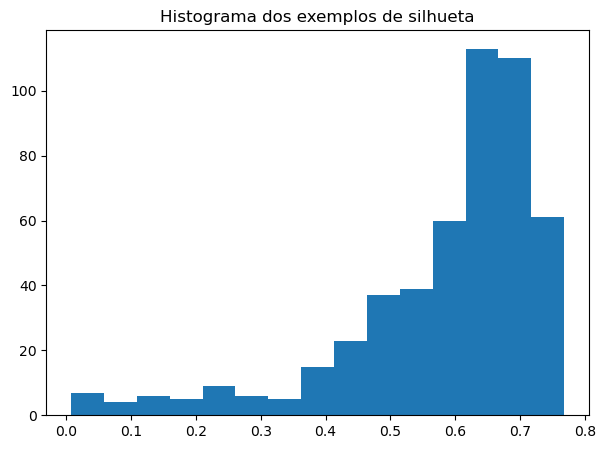

In [18]:
f, ax = plt.subplots(figsize=(7,5))
ax.hist(silhueta_ex, bins=15)
ax.set_title("Histograma dos exemplos de silhueta")
plt.show()

Nesse gráfico da para perceber que a maioria dos dados estam próximos de 1, oq é bom (mais próximo melhor).

## Como funciona

A média do coeficiente da silhueta pode ser usada para descrevr os ajustes inteiros do modelo.

In [19]:
silhueta_ex.mean()

0.5844725391373596

O módulo `metrics`também tem uma função para chegar no valor da média

In [20]:
metrics.silhouette_score(blobs, kmean.labels_)

0.5844725391373596

In [21]:
# visualizar
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
blobs, classes =  make_blobs(500, centers=10)
silhouete_avg = []
for k in range(2,60):
    kmean = KMeans(n_clusters=k).fit(blobs)
    silhouete_avg.append(metrics.silhouette_score(blobs, kmean.labels_))

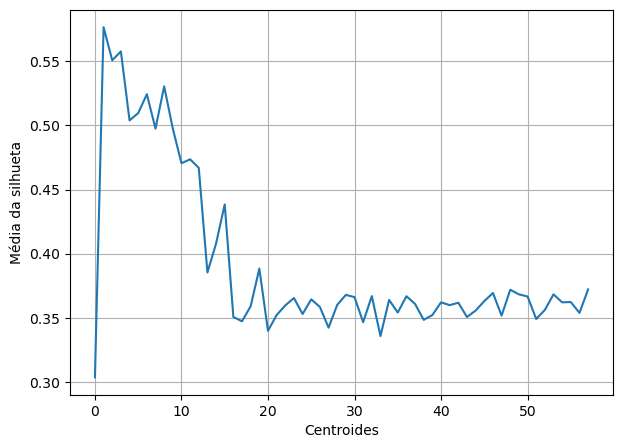

In [23]:
f, ax = plt.subplots(figsize= (7,5))
ax.plot(silhouete_avg)
ax.set_xlabel("Centroides")
ax.set_ylabel("Média da silhueta")
ax.grid(True, which="both")
plt.show()

O gráfico mostra as médias da silhueta em função dos centroides.  No começo testamos tendo 3 centroides, mas no gráfico vemos que o valor o melhor valor está entre 0-10. Esse gráfico serve para fazer uma estimativa da quantidade de grupos aproximadamente.

## Avaliando a correção dos agrupamentos

Avaliando o k-means quando o agrupamento é conhecido,na maioria dos casos, é desconhecido mas se há algumas anotações será possível se aproximar da veracidade, para isso criarei um conjunto de dados simples, e avaliar alguns pontos.

In [24]:
from sklearn import datasets
from sklearn import cluster

In [25]:
blob , veracidade = datasets.make_blobs(1000, centers=3, cluster_std=1.75)

## COm fazer

1. primeiro olhar o conjunto de dados

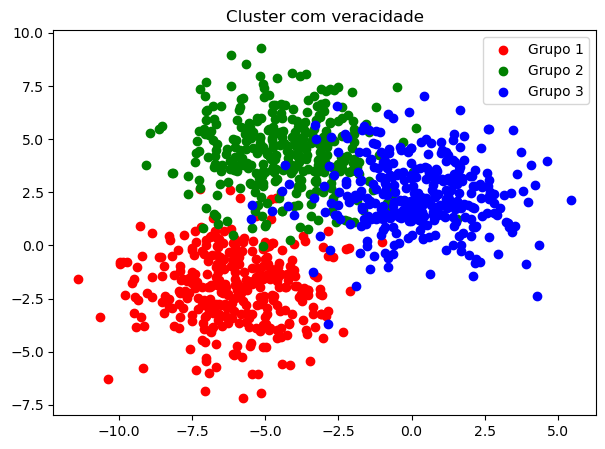

In [26]:
# import matplotlib.pyplot as plt
#%matplotlib inline

f, ax = plt.subplots(figsize=(7,5))
colors = ["r", 'g', 'b']
for i in range(3):
    p = blob[veracidade == i]
    ax.scatter(p[:,0], p[:,1], c=colors[i], label=f"Grupo {i+1}")
ax.set_title("Cluster com veracidade")
ax.legend()
plt.show()

2. Para ajustar o modelo k-means, criar um objeto `KMeans` do modelo cluster

In [27]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(blob)

KMeans(n_clusters=3)

In [28]:
kmeans.cluster_centers_

array([[ 0.41971679,  2.23499467],
       [-6.08265669, -2.02696313],
       [-4.37120234,  4.51946843]])

3. agora que houve um ajuste, veja os centroides

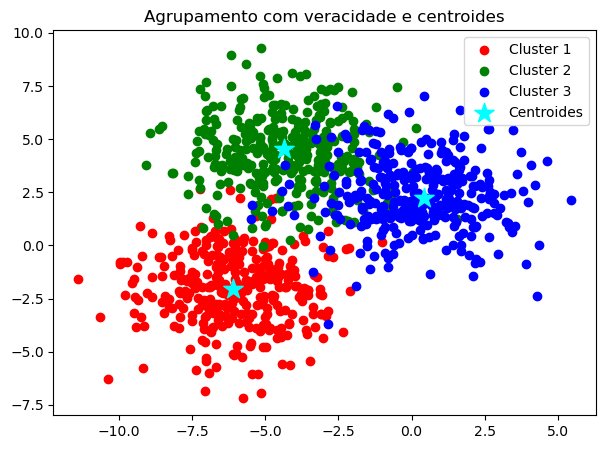

In [29]:
f,ax = plt.subplots(figsize=(7,5))
for i in range(3):
    p = blob[veracidade == i]
    ax.scatter(p[:,0], p[:,1], c=colors[i], label=f"Cluster {i+1}")

ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           marker="*", s=215, color="cyan", label="Centroides")
ax.set_title("Agrupamento com veracidade e centroides")
ax.legend()
plt.show()

4. vendo o rendimento do agrupamento como um exercicio de classificação, há métricas que vão ser úteis aqui

In [30]:
for i in range(3):
    print((kmeans.labels_== veracidade)[veracidade == i].astype(np.int64).mean())

0.011976047904191617
0.03903903903903904
0.0960960960960961


Há alguns retrocesso no agrupamento, primeiro ajustar para depois ver a exatidão

In [31]:
nova_veracidade = veracidade.copy()
nova_veracidade[veracidade == 1] = 2
nova_veracidade[veracidade == 2] = 1

In [32]:
for i in range(3):
    print((kmeans.labels_==nova_veracidade)[nova_veracidade == i].astype(np.int64).mean())

0.011976047904191617
0.018018018018018018
0.8978978978978979


O segunda medida para aprender é `mutual information score` (pontuação de informação mútua)

In [33]:
#from sklearn import metrics
metrics.normalized_mutual_info_score(veracidade, kmeans.labels_)

0.7059564930768099

Se a pontuação vai para perto de zero, não há um processo similar entre veracidade e kmean.labels_ , se a pontuçaõ vai para perto de um '1', há uma grande quantidade de acordo entre os labels (etiquetas que machine learning usa para identificar os dados)

In [34]:
#exemplo de score indo para 1
metrics.normalized_mutual_info_score(veracidade, veracidade)

1.0

In [35]:
metrics.mutual_info_score(veracidade, kmeans.labels_)

0.7754258115952638

`normalized_mutual_info_score` e `mutual_info_score` são bem parecidos, normalized_mutual_info_score é o `mutual_info_score` dividido pela raiz do produto de cada conjunto veraz e etiquetado.

Uma metrica para cluster que não é muito comentada é `inertia` que é a soma da diferença dos quadrados entre cada ponto.

In [36]:
kmeans.inertia_

5226.695354341342

## Usando MiniBatch K-means para lidar com mais dados

minibatch k-means é uma solução com uma melhor complexidade algoritmica, para grandes quantidades de dados.

1. primeiro olhar para a diferença em velocidade de computação, e depois os erros nas estimativas

In [37]:
import numpy as np
from sklearn.datasets import make_blobs

blobs, labels = make_blobs(int(1e7),3)
from sklearn.cluster import KMeans, MiniBatchKMeans

In [38]:
kmea = KMeans(n_clusters=3)
minibatch =  MiniBatchKMeans(n_clusters=3)

2. Uma vez a configuração está pronta, medir as diferenças

In [39]:
%time kmea.fit(blobs)

CPU times: user 5.19 s, sys: 284 ms, total: 5.47 s
Wall time: 1.64 s


KMeans(n_clusters=3)

In [40]:
%time minibatch.fit(blobs)

CPU times: user 327 ms, sys: 8.15 ms, total: 335 ms
Wall time: 127 ms


MiniBatchKMeans(n_clusters=3)

3. A diferença entre o desempenho do agrupamento a continuação:


In [41]:
kmea.cluster_centers_

array([[-4.08236066,  3.92560586,  0.45396177],
       [ 3.39359315, -5.50798241, -0.82049481],
       [-3.78802939, -9.90936529,  9.44472108]])

In [42]:
minibatch.cluster_centers_

array([[-4.06753808,  3.92330408,  0.43996001],
       [-3.78127503, -9.91778269,  9.45395605],
       [ 3.40826783, -5.50601339, -0.82168918]])

4. Olhando nas duas matrizes, ver a distância entre os primeiro centros do agrupamento

In [43]:
from sklearn.metrics import pairwise

In [44]:
pairwise.pairwise_distances(kmea.cluster_centers_[0].reshape(1,-1),
                           minibatch.cluster_centers_[0].reshape(1,-1))

array([[0.02051965]])

5. olhar na diagonal principal da matriz, que contem as diferenças do centro do grupo

In [45]:
np.diag(pairwise.pairwise_distances(kmea.cluster_centers_,minibatch.cluster_centers_))

array([ 0.02051965, 13.28493179, 13.28816697])

O minibatch trabalha com lotes,  e esses lotes são as chaves, os lotes são iterados até encontrar a média do lote, na proxima iteração a média do lote é atualizada com relação ao anterior.  Há um parâmetro `batch_size` que determina o tamanho do lote. Por curiosidade configurar para o tamanho do lote ser de 10milhões que é o mesmo tamamho do conjunto de dados.

In [47]:
minibatch2 = MiniBatchKMeans(batch_size=len(blobs))
%time minibatch2.fit(blobs)

CPU times: user 3min 12s, sys: 5.16 s, total: 3min 17s
Wall time: 1min 4s


MiniBatchKMeans(batch_size=10000000)

Um exemplo claro  para calcular o tempo de desempenho de um modelo, no anterior o minibatch demorou em torno de 130ms, e aqui demorou mais de 1 minuto. Isso demonstra que escolher más condições iniciais , influencia como o modelo vai performar.

> \[...]Utiliza o poder de muitas amostras aleatórias, semelhante ao bootstrapping. Ao criar um algoritmo para grandes volumes de dados, pode utilizar muitas amostras aleatórias em muitas máquinas que processam em paralelo.

## Quantificando uma imagem com agrupamento K-mean

Processamento de imagens  com clustering ou agrupamento. Dados de imagens são dados também e o agrupamento pode ser usado para ver onde estam os objetos numa imagem.

er a imagem, a imagem será traduzida em uma matriz 3D, x e y são as coordenadas e a terceira dimensão é a representação das cores (RGB)

1. Ler a imagem 

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

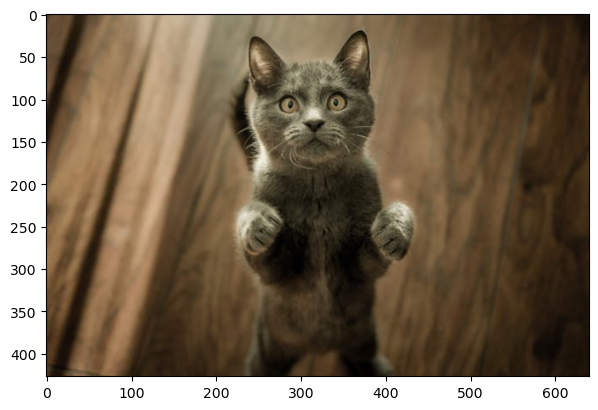

In [56]:
img = plt.imread("shot.jpg")
plt.figure(figsize=(7,5))
plt.imshow(img)
plt.show()

2. verificar a dimensão

In [57]:
img.shape

(427, 640, 3)

Um jeito de quantificar uma imagem é , pensar em ter um monte de pontos em um espaço dimensional de 3 dimensões e agrupar os pontos reduzindo o número de cores distantes na imagem.

3. reconfigurar a matriz.

In [58]:
x,y,z = img.shape

In [59]:
long_img = img.reshape(x*y, z)

In [60]:
long_img.shape

(273280, 3)

O processo de agrupamento começou, a continuação criar um objeto K-means. Agrupar em 5 grupos, ou seja, só 5 cores. Aplicar o aprendido anteriormente (silhueta) 

In [61]:
from sklearn import cluster
K_means = cluster.KMeans(n_clusters=5)
K_means.fit(long_img)
centros = K_means.cluster_centers_
centros

array([[147.54954415, 121.88308884,  88.5215074 ],
       [ 73.73075387,  55.87870447,  33.25382926],
       [185.82653016, 162.45510795, 130.49543735],
       [ 38.67684337,  28.19249373,  15.7855187 ],
       [108.61289849,  86.11465871,  57.5146359 ]])

Os centros foram calculados, o próximo passo é etiquetar (label) os dados. Isso vai dizer quais pontos vão em quais grupos.

In [62]:
etiquetas = K_means.labels_
etiquetas

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [68]:
etiquetas.shape

(273280,)

Até aqui será necessário manipulação de Matrizes com Numpy e uma reconfiguração na Matriz

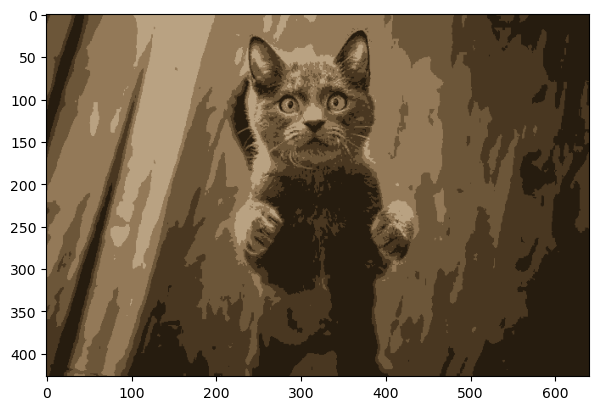

In [85]:
plt.figure(figsize=(7,5))
plt.imshow(centros[etiquetas].reshape(x,y,z).astype(np.int64))
plt.show()

## Encontrando o objeto mais próximo 

 Para isso, é preciso encontrar a distância métrica, computar distância `pairwise`, e comparar os resultados com o que é esperado.
`sklearn.metrics.pairwise` contém funções para  computar as distâncias entre vetores numa matriz X, ou entre vetores em X e Y.

Será usado a função `pairwise_ditances` para determinar a proximidade dos objetos.

1. import  `pairwise` do `sklearn.metrics` e criar um conjunto de dados com este.

In [86]:
import numpy as np
from sklearn.metrics import pairwise
from sklearn.datasets import make_blobs

In [87]:
points, labels = make_blobs()

2.  computar a distância usando `parwise_distances`

In [88]:
distancias = pairwise.pairwise_distances(points)

A `distancias` é uma matriz NxN com zeros na diagonal principal, ver a distancia entre cada ponto e o primeiro ponto

In [92]:
np.diag(distancias)[:5]

array([0., 0., 0., 0., 0.])

In [93]:
distancias[0][:5]

array([ 0.        ,  5.6223059 , 12.20218458,  2.49066303,  0.2786105 ])

3. Fazer um ranking da proximidade dos pontos com `np.argsort`

In [96]:
ranks = np.argsort(distancias[0])

In [97]:
ranks[:5]

array([ 0,  4, 43, 31, 79])

4. Com `argsort` podemos organizar o *pontos* da matriz

In [98]:
points[ranks][:5]

array([[-6.34252825,  4.62298682],
       [-6.46306874,  4.87417162],
       [-5.79507547,  4.59091885],
       [-6.57577852,  4.12386547],
       [-6.84759832,  4.35280038]])

In [100]:
sp_points = points[ranks][:15]

5. mostrar o ponto escolhido da cor "verde", os pontos proximos da cor "vermelho" e o resto de outra cor

In [102]:
#import matplotlib.pyplot as plt
%matplotlib inline

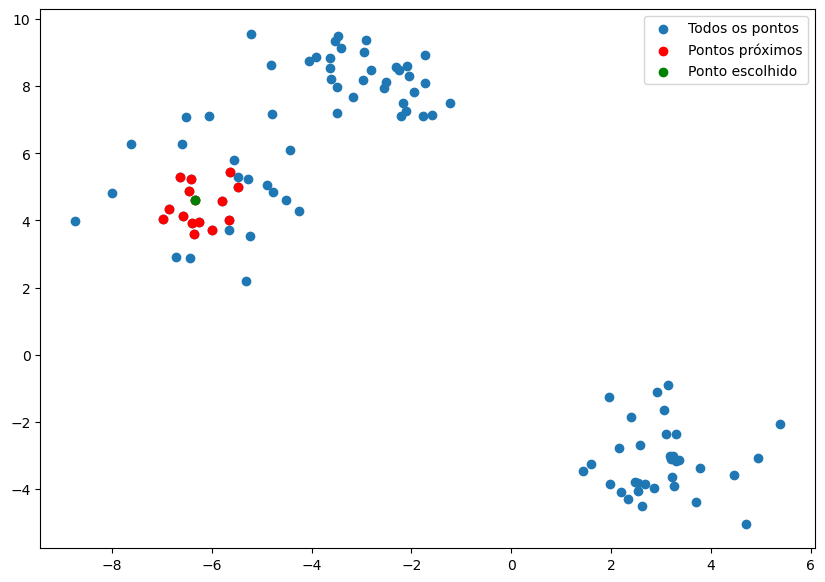

In [105]:
plt.figure(figsize=(10,7))
plt.scatter(points[:,0], points[:,1], label="Todos os pontos")
plt.scatter(sp_points[:,0], sp_points[:,1], color='red', label="Pontos próximos")
plt.scatter(points[0,0],points[0,1], color="green", label="Ponto escolhido")
plt.legend()
plt.show()

## Como funciona
Cada ponto é medido com a função `pairwise`, tendo dois pontos representados como vector num espaço N-dimensional com componentes $p_i$ e $q_i$, o padrão é a distancia Euclideana

$$d(p,q)= \sqrt{\sum_{n=1}^N (p_i - q_i)^2}$$

No python essa fórmula é assim:

In [107]:
def euclidean_distancia(x,y):
    return np.power(np.power(x - y, 2).sum(),.5)

In [108]:
euclidean_distancia(points[0], points[1])

5.622305899606588

Por exemplo, utilizando o primeiro ponto como ponto de origem, quanto terá que "viajar " até encontrar o ponto (5,5)

In [109]:
pairwise.pairwise_distances([[0,0],[5,5]], metric="cityblock")[0]

array([ 0., 10.])

## Agrupamento probabilístico com mistura de modelo Gaussiano

Utilizando o K-mean é assumido que a variancia é igual, mas se tiver uma situação onde a viriancia não são iguais e cada grupo tem alguma probabilidade de ser associado, será utilizado modelos Gaussianos

1. Criar dados, simular a altura de homem e mulher por exemplo

In [110]:
#import numpy as np
N = 1000
in_h = 72
in_m = 66
s_h = 2
s_m = s_h
homem = np.random.normal(in_h, s_h, N)
mulher = np.random.normal(in_m, s_m, N)

In [111]:
#import matplotlib.plyplot as plt
%matplotlib inline

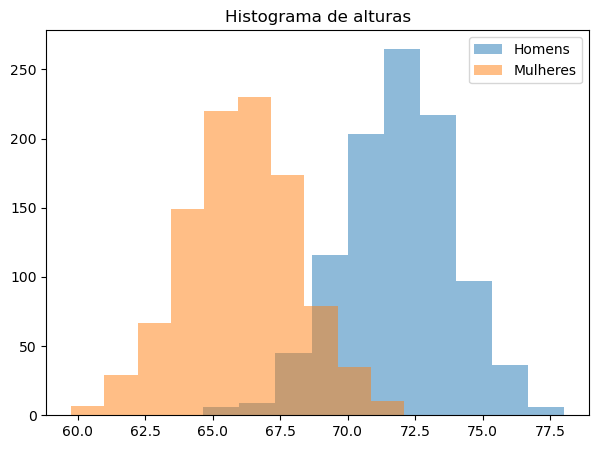

In [112]:
f,ax = plt.subplots(figsize=(7,5))
ax.set_title("Histograma de alturas")
ax.hist(homem, alpha=.5, label="Homens")
ax.hist(mulher,alpha=.5, label="Mulheres")
ax.legend()
plt.show()

2. criar subexemplos do grupo, ajustando a distribuição, para depois fazer uma previsão dos grupos restantes

In [113]:
exemplo_aleatorio = np.random.choice([True, False], size=homem.size)

In [116]:
h_test = homem[exemplo_aleatorio]
h_treino = homem[~exemplo_aleatorio]
m_test = mulher[exemplo_aleatorio]
m_treino = mulher[~exemplo_aleatorio]

3. Obter uma distribuição empírica das alturas de ambos baseado no conjunto de treino

In [117]:
from scipy import stats
h_pdf = stats.norm(h_treino.mean(), h_treino.std())
m_pdf = stats.norm(m_treino.mean(), m_treino.std())

4. ver a exatidão

In [118]:
h_pdf.pdf(homem[0])

0.1893322531428762

In [119]:
m_pdf.pdf(mulher[0])

0.1731404956252031

5. Uma diferença nas probabilidades, mas correspondem ao gráfico, onde homens aparentemente tem mais altura, suponha que há uma situação quando a probabilidade das mulheres são mais altas que os homens, mas serão sobreescritas se a probabilidade dos homens é maior.

In [139]:
guesses_m = np.ones_like(m_test)
guesses_m[m_pdf.pdf(m_test) < h_pdf.pdf(m_test)]  = 0

6. ver se o `guesses_m` é 1 se está correto e 0 se não está correto

In [141]:
guesses_m.mean()

0.9191489361702128

In [145]:
guesses_ho =np.ones_like(h_test)
guesses_ho[h_pdf.pdf(h_test) > m_pdf.pdf(m_test)] = 0
guesses_ho.mean()

0.46382978723404256

7. Fazer que a variancia seja diferente entre grupos. Primeiro criar novos dados

In [146]:
s_h = 1
s_m = 4
homem = np.random.normal(in_h, s_h, N)
mulher = np.random.normal(in_m, s_m, N)

8. Criar um conjunto de treino

In [147]:
h_test = homem[exemplo_aleatorio]
h_treino = homem[~exemplo_aleatorio]
m_test =  mulher[exemplo_aleatorio]
m_treino = mulher[~exemplo_aleatorio]

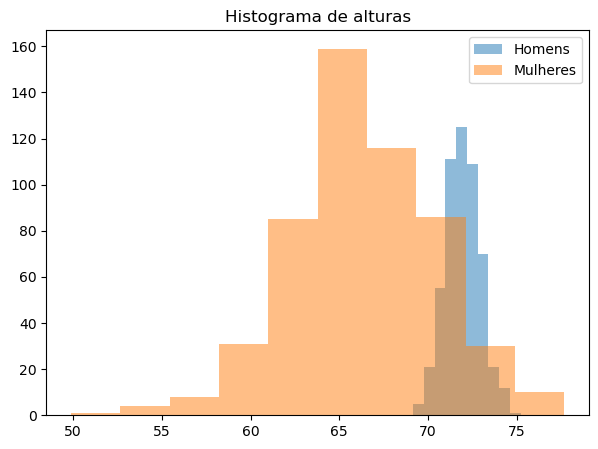

In [148]:
f,ax = plt.subplots(figsize=(7,5))
ax.set_title("Histograma de alturas")
ax.hist(h_treino, alpha=0.5, label="Homens")
ax.hist(m_treino, alpha=0.5, label="Mulheres")
ax.legend()
plt.show()

9. Criar os mesmos PDF

In [149]:
h_pdf = stats.norm(h_treino.mean(), h_treino.std())
m_pdf = stats.norm(m_treino.mean(), m_treino.std())

/tmp/ipykernel_24282/4200701481.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, h_pdf.pdf(x), 'k', linewidth=2, color='blue' ,label="Homens")
/tmp/ipykernel_24282/4200701481.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, m_pdf.pdf(x), 'k', linewidth=2, color='green',label="Mulheres")


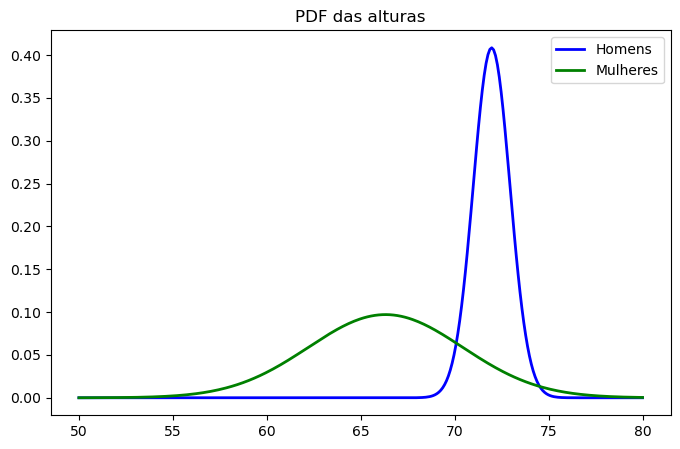

In [158]:
x = np.linspace(50,80,300)
plt.figure(figsize=(8,5))
plt.title("PDF das alturas")
plt.plot(x, h_pdf.pdf(x), 'k', linewidth=2, color='blue' ,label="Homens")
plt.plot(x, m_pdf.pdf(x), 'k', linewidth=2, color='green',label="Mulheres")
plt.legend()
plt.show()

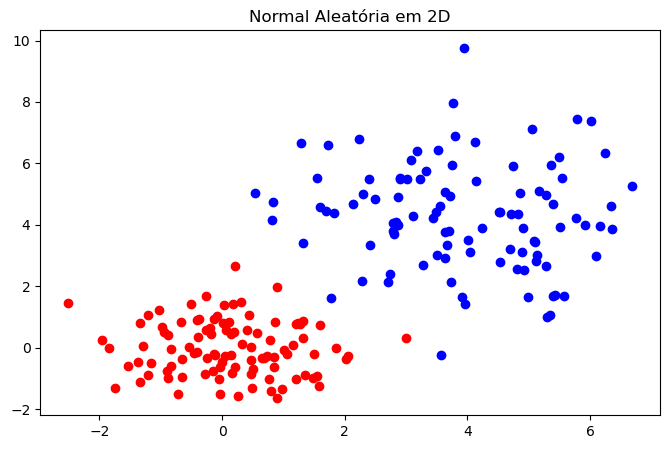

In [159]:
class_A = np.random.normal(0,1,size=(100,2))
class_B = np.random.normal(4,1.5,size=(100,2))
f,ax = plt.subplots(figsize=(8,5))
plt.title("Normal Aleatória em 2D")
ax.scatter(class_A[:,0], class_A[:,1], label="A", c='r')
ax.scatter(class_B[:,0], class_B[:,1], label="B", c='b')
plt.show()

## Como funciona

Agora veja como usar o scikit-learn para classificar pontos, baseados na distribuição

In [160]:
from sklearn.mixture import GaussianMixture

In [161]:
gmm = GaussianMixture(n_components=2)
X = np.row_stack((class_A, class_B))
y = np.hstack((np.ones(100),np.zeros(100)))

Criar um conjunto de treinamento

In [162]:
train = np.random.choice([True, False],200)
gmm.fit(X[train])

GaussianMixture(n_components=2)

Ajustar  e preveer está pronto.

In [163]:
gmm.fit(X[train])
gmm.predict(X[train])[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Há outros métodos , por exemplo usar o `score_samples`que valem a pena ser estudados.